In [22]:
import numpy as np
import pandas as pd
import h5py
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.keras.layers as tfl

In [23]:
file_path_train = '/Users/arun/Downloads/datasets/train_signs.h5'
file_path_test = '/Users/arun/Downloads/datasets/test_signs.h5'

In [24]:
with h5py.File(file_path_train, 'r') as h5_file:
    # List available datasets
    keys = list(h5_file.keys())
    print("Available datasets:", keys)
    
    # Example: Load datasets into numpy arrays
    classes = h5_file[keys[0]][()]
    train_x = h5_file[keys[1]][()]  # Read dataset as NumPy array
    train_y = h5_file[keys[2]][()]

Available datasets: ['list_classes', 'train_set_x', 'train_set_y']


In [25]:
with h5py.File(file_path_test, 'r') as h5_file:
    # List available datasets
    keys = list(h5_file.keys())
    print("Available datasets:", keys)
    
    # Example: Load datasets into numpy arrays
    classes = h5_file[keys[0]][()]
    test_x = h5_file[keys[1]][()]  # Read dataset as NumPy array
    test_y = h5_file[keys[2]][()]

Available datasets: ['list_classes', 'test_set_x', 'test_set_y']


In [26]:
train_x.shape, train_y.shape, test_x.shape, test_y.shape, classes.shape

((1080, 64, 64, 3), (1080,), (120, 64, 64, 3), (120,), (6,))

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

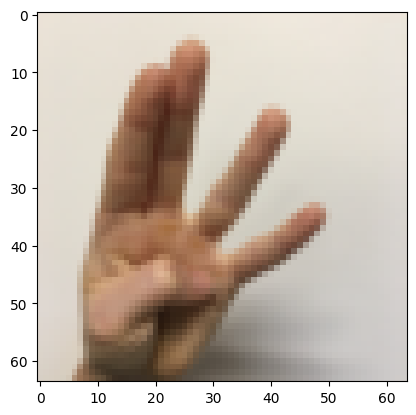

In [27]:
index = 9
plt.imshow(train_x[index])
print ("y = " + str(np.squeeze(train_y[:, index])))

In [28]:
def convert_to_one_hot(Y, C):
    return np.eye(C)[Y.reshape(-1)]

In [29]:
X_train = train_x/255
X_test = test_x/255
Y_train = convert_to_one_hot(train_y, 6)
Y_test = convert_to_one_hot(test_y, 6)

In [30]:
print("X_train shape:", X_train.shape)
print("Y_train shape:", Y_train.shape)
print("X_test shape:", X_test.shape)
print("Y_test shape:", Y_test.shape)

X_train shape: (1080, 64, 64, 3)
Y_train shape: (1080, 6)
X_test shape: (120, 64, 64, 3)
Y_test shape: (120, 6)


In [31]:
def convolutional_model(input_shape):

    input_img = tf.keras.Input(shape=input_shape)
    Z1 = tfl.Conv2D(8, 4, activation='linear', padding="same", strides=1)(input_img)
    A1 = tfl.ReLU()(Z1)
    P1 = tfl.MaxPool2D(pool_size=(8, 8), strides=(8, 8), padding='same')(A1)
    Z2 = tfl.Conv2D(16, 2, activation='linear', padding="same", strides=1)(P1)
    A2 = tfl.ReLU()(Z2)
    P2 = tfl.MaxPool2D(pool_size=(4, 4), strides=(4, 4), padding='same')(A2)
    F = tfl.Flatten()(P2)
    outputs = tfl.Dense(6, activation='softmax')(F)
    model = tf.keras.Model(inputs=input_img, outputs=outputs)
    return model

In [32]:
conv_model = convolutional_model((64, 64, 3))
conv_model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
conv_model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 64, 64, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 64, 64, 8)      │           392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu (ReLU)                    │ (None, 64, 64, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 8, 8, 8)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 8, 8, 16)       │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_1 (ReLU)                  │ (None, 8, 8, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 2, 2, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 6)              │           390 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,310 (5.12 KB)

 Trainable params: 1,310 (5.12 KB)

 Non-trainable params: 0 (0.00 B)

In [33]:
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, Y_train)).batch(64)
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, Y_test)).batch(64)
history = conv_model.fit(train_dataset, epochs=100, validation_data=test_dataset)

Epoch 1/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.1610 - loss: 1.8413 - val_accuracy: 0.1750 - val_loss: 1.7902
Epoch 2/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.1600 - loss: 1.7900 - val_accuracy: 0.2167 - val_loss: 1.7824
Epoch 3/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.2152 - loss: 1.7803 - val_accuracy: 0.2083 - val_loss: 1.7770
Epoch 4/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.2671 - loss: 1.7735 - val_accuracy: 0.2167 - val_loss: 1.7721
Epoch 5/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.3093 - loss: 1.7669 - val_accuracy: 0.2833 - val_loss: 1.7638
Epoch 6/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.3367 - loss: 1.7577 - val_accuracy: 0.3250 - val_loss: 1.7554
Epoch 7/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.3681 - loss: 1.7457 - val_accuracy: 0.3000 - val_loss: 1.7445
Epoch 8/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.4088 - loss: 1.7308 - val_accuracy: 0.

In [34]:
history.history

{'accuracy': [0.16296295821666718,
  0.17037037014961243,
  0.23240740597248077,
  0.2527777850627899,
  0.3166666626930237,
  0.32685184478759766,
  0.3620370328426361,
  0.3907407522201538,
  0.4287036955356598,
  0.42500001192092896,
  0.44999998807907104,
  0.4564814865589142,
  0.49074074625968933,
  0.5027777552604675,
  0.5314815044403076,
  0.5472221970558167,
  0.5537037253379822,
  0.5675926208496094,
  0.5731481313705444,
  0.5898148417472839,
  0.5972222089767456,
  0.6018518805503845,
  0.605555534362793,
  0.614814817905426,
  0.6240741014480591,
  0.635185182094574,
  0.6407407522201538,
  0.645370364189148,
  0.6564815044403076,
  0.6657407283782959,
  0.6712962985038757,
  0.675000011920929,
  0.6842592358589172,
  0.6888889074325562,
  0.6953703761100769,
  0.6972222328186035,
  0.7027778029441833,
  0.7046296000480652,
  0.7046296000480652,
  0.7074074149131775,
  0.7138888835906982,
  0.7166666388511658,
  0.7212963104248047,
  0.7240740656852722,
  0.73055553436279

/var/folders/xz/_q1lhz9n52lb8rsrv2yy36dm0000gn/T/ipykernel_3704/974158325.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_loss.rename(columns={'loss':'train','val_loss':'validation'},inplace=True)
/var/folders/xz/_q1lhz9n52lb8rsrv2yy36dm0000gn/T/ipykernel_3704/974158325.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_acc.rename(columns={'accuracy':'train','val_accuracy':'validation'},inplace=True)


[Text(0.5, 0, 'Epoch'), Text(0, 0.5, 'Accuracy')]

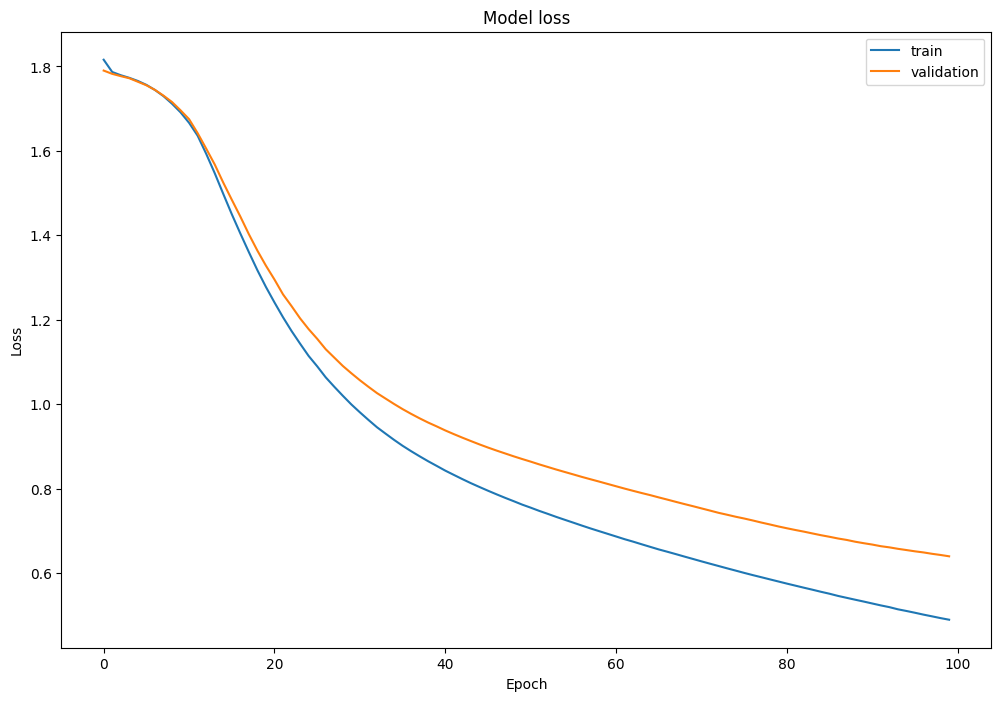

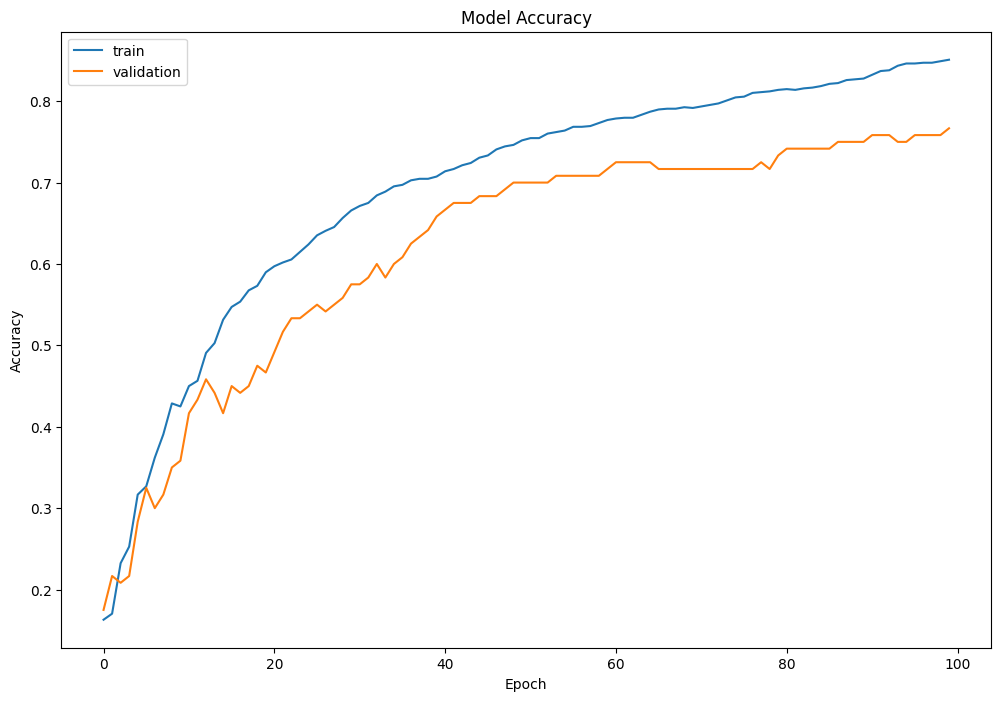

In [35]:
df_loss_acc = pd.DataFrame(history.history)
df_loss= df_loss_acc[['loss','val_loss']]
df_loss.rename(columns={'loss':'train','val_loss':'validation'},inplace=True)
df_acc= df_loss_acc[['accuracy','val_accuracy']]
df_acc.rename(columns={'accuracy':'train','val_accuracy':'validation'},inplace=True)
df_loss.plot(title='Model loss',figsize=(12,8)).set(xlabel='Epoch',ylabel='Loss')
df_acc.plot(title='Model Accuracy',figsize=(12,8)).set(xlabel='Epoch',ylabel='Accuracy')